# Torch essentials
> Practical and direct introduction to PyTorch

- toc: true 
- badges: true
- comments: true
- author: Zeel B Patel
- categories: [ML]

## Zen of PyTorch

* Give the power to user

## Let's go hands-on

In [1]:
import torch
import numpy as np

In [2]:
tensor1 = torch.tensor([1,2,3.], dtype=torch.float32)
tensor2 = torch.tensor([5,6,7.], dtype=torch.float64)
display(tensor1, tensor2)

tensor([1., 2., 3.])

tensor([5., 6., 7.], dtype=torch.float64)

In [3]:
display(type(tensor1), type(tensor2))

torch.Tensor

torch.Tensor

In [4]:
display(tensor1.dtype, tensor2.dtype)

torch.float32

torch.float64

In [5]:
long_tensor = tensor1.to(torch.int32) # device, dtype, tensor
display(long_tensor)

tensor([1, 2, 3], dtype=torch.int32)

In [6]:
long_tensor.device

device(type='cpu')

In [7]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
long_tensor_gpu = long_tensor.to(device)
long_tensor_gpu

tensor([1, 2, 3], device='cuda:0', dtype=torch.int32)

In [8]:
long_tensor_born_on_gpu = torch.zeros(2,10, device=device).to(torch.float64)
long_tensor_born_on_gpu

tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], device='cuda:0',
       dtype=torch.float64)

In [9]:
inspired_tensor = torch.tensor([1.,2.]).to(long_tensor_born_on_gpu)
inspired_tensor

tensor([1., 2.], device='cuda:0', dtype=torch.float64)

In [10]:
np_array = np.array([1,2,3.])
np_array.log()

AttributeError: 'numpy.ndarray' object has no attribute 'log'

In [11]:
pt_array = torch.tensor([1,2,3.])
pt_array.log() # sin(), cos(), tan(), exp()

tensor([0.0000, 0.6931, 1.0986])

## Gradient is all you need

In [12]:
import matplotlib.pyplot as plt

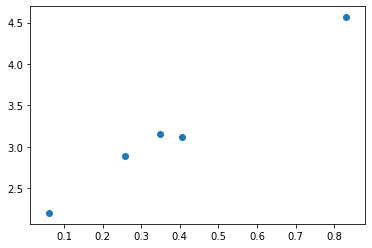

In [13]:
x = torch.rand(5,1)
y = 3 * x + 2 + torch.randn_like(x)*0.1

plt.scatter(x, y);

In [31]:
x_plus_ones = torch.cat([torch.ones_like(x), x], dim=1)
x_plus_ones.shape

torch.Size([5, 2])

In [32]:
theta = torch.zeros(2,1, requires_grad=True)
theta

tensor([[0.],
        [0.]], requires_grad=True)

In [33]:
theta.grad

In [34]:
theta.grad_fn

In [35]:
lr = 0.1

y_pred = x_plus_ones@theta
loss = ((y_pred - y)**2).mean()
loss.backward()
# y_pred = torch.matmul(x_plus_ones, theta)
# y_pred = torch.mm(x_plus_ones, theta)

In [36]:
theta.grad # dloss/dtheta

tensor([[-6.3681],
        [-2.8128]])

In [37]:
theta.grad_fn

In [38]:
theta.data -= lr * theta.grad.data

In [39]:
theta

tensor([[0.6368],
        [0.2813]], requires_grad=True)

In [40]:
theta.grad_fn

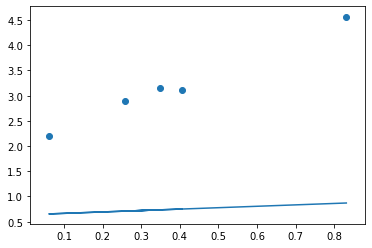

In [41]:
with torch.no_grad():
    plt.scatter(x, y)
    plt.plot(x, x_plus_ones@theta)

In [42]:
for i in range(10):
    theta.grad.data.zero_()
    y_pred = x_plus_ones@theta
    loss = ((y_pred - y)**2).mean()
    loss.backward()
    theta.data -= lr * theta.grad

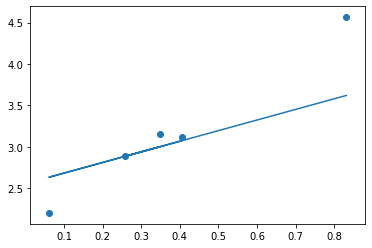

In [43]:
with torch.no_grad():
    plt.scatter(x, y)
    plt.plot(x, x_plus_ones@theta)

## Advanced

In [56]:
class LinearRegression(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.theta = torch.nn.Parameter(torch.zeros(2,1))
#         self.register_parameter(theta, torch.zeros(2,1))
    
    def forward(self, x): # Don't call directly. it is called by __call__ method
        x_plus_ones = torch.cat([torch.ones_like(x), x], dim=1)
        y_pred = x_plus_ones@self.theta
        return y_pred

In [57]:
model = LinearRegression()
model

LinearRegression()

In [58]:
for name, value in model.named_parameters():
    print(name, value)

theta Parameter containing:
tensor([[0.],
        [0.]], requires_grad=True)


In [59]:
optimizer = torch.optim.Adam(model.parameters(), lr=0.1)
loss_fn = torch.nn.MSELoss() # torch.nn.CrossEntropyLoss()

for i in range(10):
    optimizer.zero_grad()
    
    y_pred = model(x)
    loss = loss_fn(y_pred, y)
    loss.backward()
    
    optimizer.step()

In [62]:
model.state_dict()

OrderedDict([('theta',
              tensor([[0.9799],
                      [0.9808]]))])

## Wanna run on GPU?

In [65]:
x_gpu = x.to(device)
y_gpu = y.to(device)

In [66]:
print(model.theta)
model.to(device)
print(model.theta)

Parameter containing:
tensor([[0.9799],
        [0.9808]], requires_grad=True)
Parameter containing:
tensor([[0.9799],
        [0.9808]], device='cuda:0', requires_grad=True)


In [67]:
optimizer = torch.optim.Adam(model.parameters(), lr=0.1)
loss_fn = torch.nn.MSELoss() # torch.nn.CrossEntropyLoss()

for i in range(10):
    optimizer.zero_grad()
    
    y_pred = model(x_gpu)
    loss = loss_fn(y_pred, y_gpu)
    loss.backward()
    
    optimizer.step()

## State dictionary

In [68]:
# torch.save(model.state_dict(), path)
# model.load_state_dict(torch.load(path))

## NN way

In [69]:
class LinearRegression(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.layer = torch.nn.Linear(2, 1) # torch.nn.Linear(128, 64)
        # What else? 
#         self.activation = torch.nn.ReLU()
#         torch.nn.LSTM()
#         torch.nn.Conv2d()
    
    def forward(self, x): # Don't call directly. it is called by __call__ method
        x_plus_ones = torch.cat([torch.ones_like(x), x], dim=1)
        y_pred = self.layer(x_plus_ones)
        return y_pred